# Creating a complex pandas dataframe
Creating a data frame that has features that range in complexity was critical for evaluating my custom scatterplot function. 

by Ben Lacar

In [168]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats, integrate
%matplotlib inline

### Create sample dataframe

I will create a data frame that 1000 samples (AKA as m or training examples). The data frame will contain made up features that have regression variables representing four distributions: flat, normal, skewed, and logarithmic. Furthermore, all features will contain values that are positive, negative, fractions, or zero. I'll also create features that serve as categorical variables. One classification feature will have 10 unique classes evenly distributed among the 1000 samples (group 1 will be in the first 100 samples, group 2 will be in samples 101-200, etc.). Another classification feature will also have 10 unique classes but have the distribution of these classes will be uneven. Altogether, there will be 14 features (n). This data frame of my imagination is found on my Github page.

#### Regression features

In [177]:
m = 1000    # Number of samples (training examples)

uniform_dist = np.arange(0, m)
gaussian_dist = np.random.normal(loc=0, scale=100, size=m)
bimodal_dist = (np.random.normal(loc=200, scale=100, size=int(m/2)).tolist()
                + np.random.normal(loc=800, scale=100, size=int(m/2)).tolist()) # I just mashed two normal distributions together
lognormal_dist = np.random.lognormal(5, 1, m)
poisson_dist = np.random.poisson(lam=0.3, size=m)
negbinomial_dist = np.random.negative_binomial(2, 0.1, size=m)
chisquare_dist = np.random.chisquare(df=4, size=m)
large_range = np.arange(0, m)**2       # Range of numbers across 6 log orders)
leftskew_dist = 100-np.random.negative_binomial(2, 0.1, size=m)

In [170]:
# Create dataframe with regression features
df = pd.DataFrame({'uniform': uniform_dist,
                  'gaussian': gaussian_dist,
                  'bimodal': bimodal_dist,
                  'lognormal': lognormal_dist,
                  'poisson': poisson_dist,
                   'negbinomial': negbinomial_dist,
                   'chisquare': chisquare_dist,
                   'large_range': large_range,
                   'leftskew_dist': leftskew_dist
                  })

In [178]:
len(np.arange(0, m)**2)

1000

#### Classification features

In [171]:
# Create classification features and add to dataframe

k = 10     # number of groups
groupSize = round(m/k)
df['class_even'] = (['group 1']*groupSize + ['group 2']*groupSize
                     + ['group 3']*groupSize + ['group 4']*groupSize
                     + ['group 5']*groupSize + ['group 6']*groupSize
                     + ['group 7']*groupSize + ['group 8']*groupSize
                     + ['group 9']*groupSize
                     + ['group 10']*(m-groupSize*(k-1)))

df['class_poisson'] = ['group ' + str(i+1) for i in poisson_dist.tolist()]

In [173]:
df.head()

,bimodal,chisquare,gaussian,large_range,leftskew_dist,lognormal,negbinomial,poisson,uniform,class_even,class_poisson
0,142.377697,1.740617,24.332997,1,87,44.231210,15,0,0,group 1,group 1
1,431.793048,6.134239,45.350824,4,57,151.034688,4,0,1,group 1,group 1
2,135.524086,2.603001,-71.852557,9,85,82.188056,25,0,2,group 1,group 1
3,250.150648,1.254292,-146.275562,16,97,350.741613,12,0,3,group 1,group 1
4,72.352841,2.047151,-31.705978,25,92,430.281095,25,0,4,group 1,group 1


In [174]:
df.tail()

,bimodal,chisquare,gaussian,large_range,leftskew_dist,lognormal,negbinomial,poisson,uniform,class_even,class_poisson
995,795.262594,0.606301,-25.345757,992016,85,62.568563,5,0,995,group 10,group 1
996,924.808564,7.979778,86.982298,994009,96,177.858532,13,1,996,group 10,group 2
997,908.639715,2.360940,-46.452396,996004,92,117.673239,15,0,997,group 10,group 1
998,865.255790,3.398398,-114.994609,998001,94,891.759597,21,0,998,group 10,group 1
999,678.835457,2.872270,135.935916,1000000,83,183.883371,32,0,999,group 10,group 1


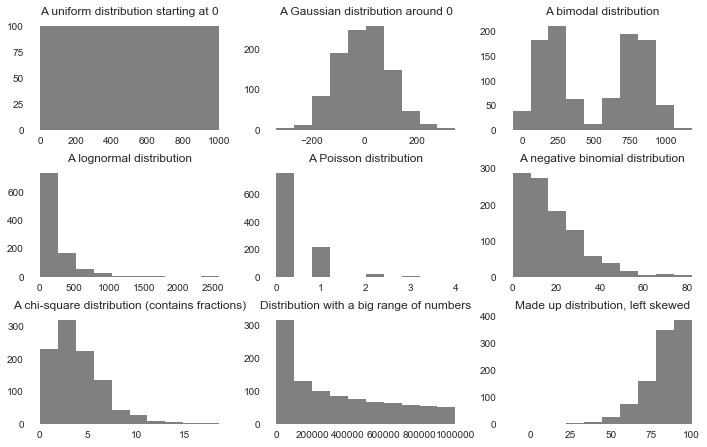

In [172]:
f, ((ax1, ax2, ax3),
    (ax4, ax5, ax6),
    (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(12,7))


ax1.hist(uniform_dist, color='gray');
ax1.set_title('A uniform distribution starting at 0');

ax2.hist(gaussian_dist, color='gray');
ax2.set_title('A Gaussian distribution around 0');

ax3.hist(bimodal_dist, color='gray') 
ax3.set_title('A bimodal distribution');  

ax4.hist(lognormal_dist, color='gray');
ax4.set_title('A lognormal distribution');

ax5.hist(poisson_dist, color='gray') ;
ax5.set_title('A Poisson distribution');
         
ax6.hist(negbinomial_dist, color='gray');
ax6.set_title('A negative binomial distribution');

ax7.hist(chisquare_dist, color='gray')
ax7.set_title('A chi-square distribution (contains fractions)');

ax8.hist(large_range, color='gray')
ax8.set_title('Distribution with a big range of numbers');

ax9.hist(leftskew_dist, color='gray')
ax9.set_title('Made up distribution, left skewed');

# figure properties
sns.set(font='Franklin Gothic Book')
sns.set_style(style='white')
sns.despine(left=True, bottom=True, right=True)   #  remove frame

# # to accomodate labeling
plt.subplots_adjust(bottom=0.1, top=0.9, left=0.125, right=0.9, hspace=0.35)
